In [22]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
import re

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

url = "https://raw.githubusercontent.com/EagleAdelaide/FinSen_Dataset/refs/heads/main/data.pptx/FinSen_US_Categorized_Timestamp.csv"
df = pd.read_csv(url)


print("Spalten:", df.columns.tolist())
print("Anzahl der Einträge:", len(df))
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berke\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Spalten: ['Title', 'Tag', 'Time', 'Content']
Anzahl der Einträge: 15534


,Title,Tag,Time,Content
0,"TSX Slightly Down, Books Weekly Gains",Stock Market,16/07/2023,"TSX Slightly Down, Books Weekly GainsUnited St..."
1,UnitedHealth Hits 4-week High,stocks,15/07/2023,UnitedHealth Hits 4-week HighUnited States sto...
2,Cisco Systems Hits 4-week Low,stocks,15/07/2023,Cisco Systems Hits 4-week LowUnited States sto...
3,AT&T Hits All-time Low,stocks,15/07/2023,AT&T Hits All-time LowUnited States stocksAT&T...
4,Microsoft Hits 4-week High,stocks,15/07/2023,Microsoft Hits 4-week HighUnited States stocks...


count    15534.000000
mean       505.852710
std        278.917884
min         90.000000
25%        228.000000
50%        473.000000
75%        727.000000
max       1117.000000
Name: text_length, dtype: float64


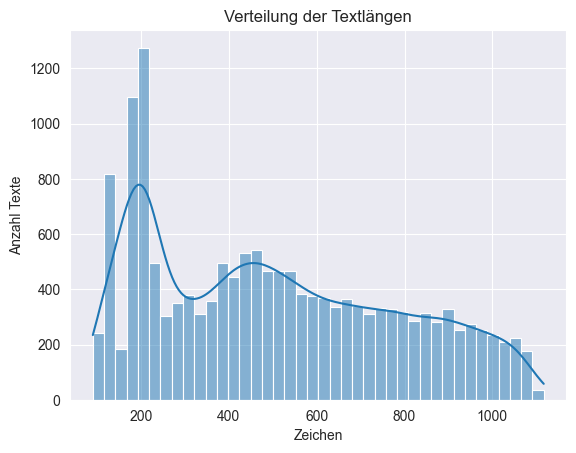

In [23]:
# Datum konvertieren
# df['date'] = pd.to_datetime(df['date']) # This column does not exist in the dataframe

# Textlänge berechnen
df['text_length'] = df['Content'].astype(str).apply(len) # Use 'Content' column

# Statistiken
print(df['text_length'].describe())

# Histogramm
sns.histplot(df['text_length'], bins=40, kde=True)
plt.title("Verteilung der Textlängen")
plt.xlabel("Zeichen")
plt.ylabel("Anzahl Texte")
plt.show()

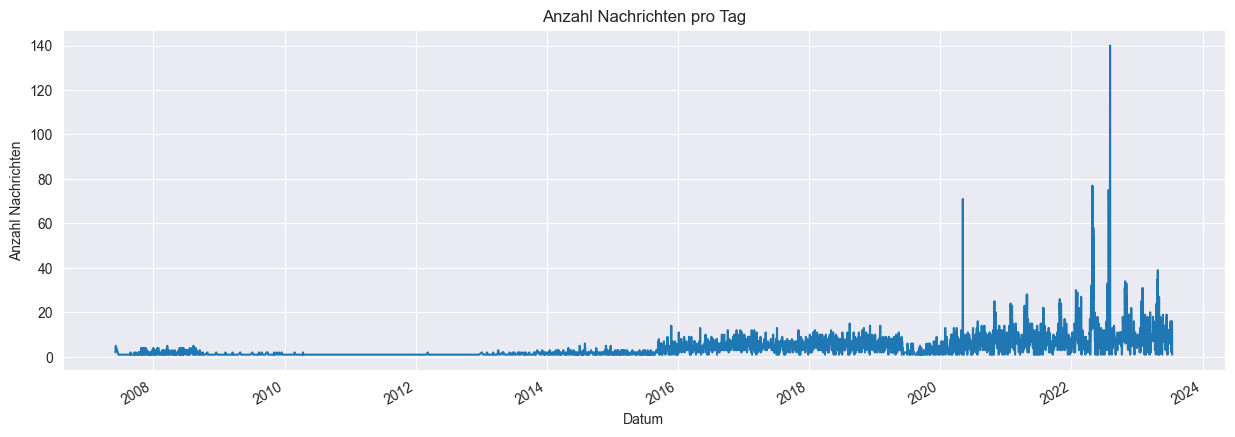

In [24]:
# Load the data from the URL into df_new
url_new = "https://raw.githubusercontent.com/EagleAdelaide/FinSen_Dataset/refs/heads/main/data.pptx/FinSen_US_Categorized_Timestamp.csv"
df_new = pd.read_csv(url_new)

# Assign df_new to df so df contains the 'Time' column
df = df_new

# Convert 'Time' column to datetime objects
df['Time'] = pd.to_datetime(df['Time'], format='%d/%m/%Y')

# Group by time and count the number of entries
daily_counts = df.groupby('Time').size()

# Plot the daily counts
daily_counts.plot(figsize=(15,5), title="Anzahl Nachrichten pro Tag")
plt.xlabel("Datum")
plt.ylabel("Anzahl Nachrichten")
plt.grid(True)
plt.show()

In [25]:
def clean_and_tokenize(text):
    text = re.sub(r'[^a-zA-Z ]', '', str(text)).lower()
    tokens = text.split()
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return tokens

# Alle Wörter extrahieren
all_words = []
df['Content'].dropna().apply(lambda t: all_words.extend(clean_and_tokenize(t))) # Use 'Content' column
word_freq = Counter(all_words)
print("Top 20 häufigste Wörter:")
print(word_freq.most_common(20))

Top 20 häufigste Wörter:
[('percent', 13929), ('expectations', 8566), ('market', 7639), ('earnings', 6820), ('week', 6075), ('points', 5905), ('usd', 5136), ('since', 4802), ('year', 4718), ('month', 4685), ('index', 4586), ('rate', 4478), ('united', 4298), ('billion', 4176), ('increased', 3965), ('dollar', 3937), ('rose', 3909), ('stocks', 3878), ('compared', 3852), ('fed', 3769)]


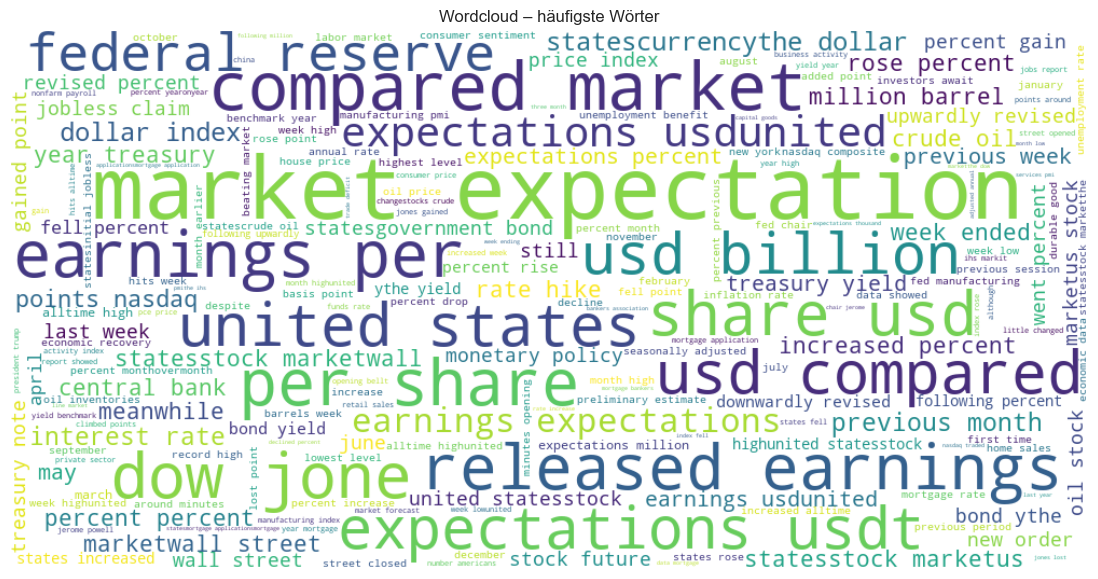

In [26]:
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(" ".join(all_words))
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud – häufigste Wörter")
plt.show()


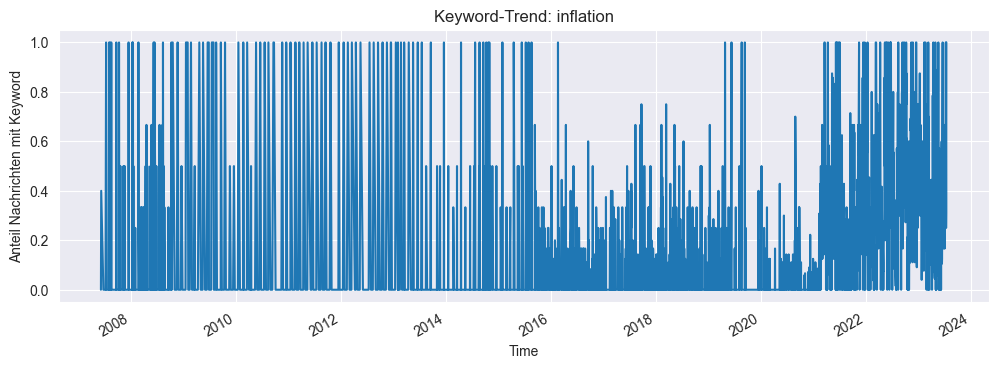

In [27]:
def keyword_trend(keyword):
    df['has_keyword'] = df['Content'].str.lower().str.contains(fr'\b{keyword}\b', na=False)
    trend = df.groupby('Time')['has_keyword'].mean()
    trend.plot(figsize=(12,4), title=f"Keyword-Trend: {keyword}")
    plt.ylabel("Anteil Nachrichten mit Keyword")
    plt.grid(True)
    plt.show()

# Beispiel: Keyword-Analyse für „inflation“
keyword_trend("inflation")